# Исходный код

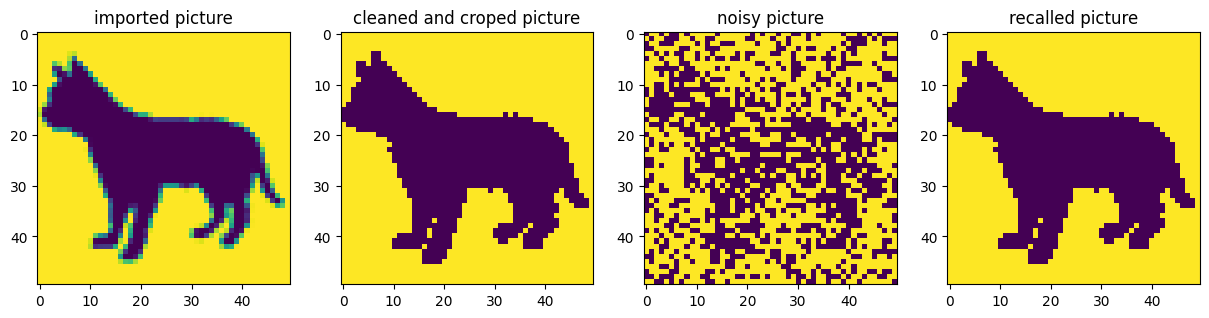

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as sp
import matplotlib.image as img

def trainer(vector):
    vector = vector.flatten()
    coefMat = np.zeros([len(vector),len(vector)])

    for i in range(len(vector)):
        for j in range(len(vector)):
            if (i!=(i-j)):
                coefMat[i][i-j] = vector[i]*vector[i-j]

    vector = np.reshape(vector, [int(np.sqrt(len(vector))),int(np.sqrt(len(vector)))])

    return coefMat

def prediction(curuptedVec,coefMat):
    curuptedVec = curuptedVec.flatten()
    predictVec = np.zeros(len(curuptedVec))
    for i in range(len(curuptedVec)):
        temp = 0
        for j in range(len(curuptedVec)):
             temp += coefMat[i][j] * curuptedVec[j]
        if (temp>0):
            predictVec[i] = 1
        if (temp<0):
            predictVec[i] = -1

    predictVec = np.reshape(predictVec, [int(np.sqrt(len(predictVec))),int(np.sqrt(len(predictVec)))])
    return predictVec

def imageGenerator(imageVector, vmax = 1):
    cleanImage = np.zeros([len(imageVector),len(imageVector)])
    for i in range(len(imageVector)):
        for j in range(len(imageVector)):
            if (imageVector[i][j] == vmax):
                cleanImage[i][j] = 1
            else:
                cleanImage[i][j] = -1
    noisyImage = cleanImage + np.random.normal(0, 2, [len(image),len(image)])

    for i in range(len(image)):
        for j in range(len(image)):
            if (noisyImage[i][j] >= 0):
                noisyImage[i][j] = 1
            else:
                noisyImage[i][j] = -1


    return cleanImage,noisyImage

#Import the image
image = img.imread('1.png','w').copy()
vector,noisyVec = imageGenerator(image)
coefMatrix = trainer(vector)
predictedVec = prediction(noisyVec,coefMatrix)

plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.imshow(image)
plt.title('imported picture')
plt.subplot(1,4,2)
plt.imshow(vector);
plt.title('cleaned and croped picture')
plt.subplot(1,4,3)
plt.imshow(noisyVec);
plt.title('noisy picture')
plt.subplot(1,4,4)
plt.imshow(predictedVec);
plt.title('recalled picture')
plt.show()


In [ ]:
v1 = vector

In [ ]:
c1 = coefMatrix

In [ ]:
p1 = predictedVec

# Переписанный на векторные вычисления

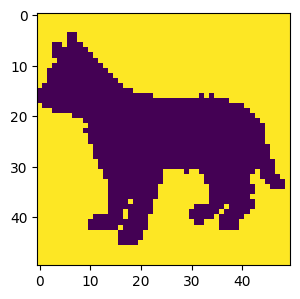

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as sp
import matplotlib.image as img

def trainer(vector):
    vector_1 = vector.flatten()
    coefMat = np.outer(vector_1, vector_1) # матрица ковариации
    np.fill_diagonal(coefMat, 0)
    return coefMat

def prediction(curuptedVec,coefMat):
    res = np.dot(coefMat, curuptedVec.flatten())
    #np.where(res > 0, 1, -1)
    res[res > 0] = 1
    res[res < 0] = -1
    res = np.reshape(res, [int(np.sqrt(len(res))),int(np.sqrt(len(res)))])
    return res

def imageGenerator(imageVector, vmax = 1): #здесь перезаписывается image и на выхоже выдается уже вектор
    cleanImage = imageVector
    cleanImage[cleanImage == vmax] = 1
    cleanImage[cleanImage != vmax] = -1
    noisyImage = cleanImage + np.random.normal(0, 2, [len(image),len(image)])
    noisyImage[noisyImage >= 0] = 1
    noisyImage[noisyImage < 0] = -1
    return cleanImage,noisyImage

#Import the image
image = img.imread('1.png','w').copy()
#print(image)
vector,noisyVec = imageGenerator(image)
coefMatrix = trainer(vector)
predictedVec = prediction(noisyVec,coefMatrix)

plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.imshow(image)
# plt.title('imported picture')
# plt.subplot(1,4,2)
# plt.imshow(vector);
# plt.title('cleaned and croped picture')
# plt.subplot(1,4,3)
# plt.imshow(noisyVec);
# plt.title('noisy picture')
# plt.subplot(1,4,4)
# plt.imshow(predictedVec);
# plt.title('recalled picture')
# plt.show()

In [ ]:
v2 = vector
c2 = coefMatrix
p2 = predictedVec

In [ ]:
print(np.array_equal(v1,v2), np.array_equal(p1, p2), np.array_equal(c1, c2))

True True True
